In [3]:
import torch
import torchvision
from torchvision.datasets import MNIST

## loading the dataset

In [4]:
dataset=MNIST(root='dataset/',download=True)

## loading the test dataset from the downloaded data

In [5]:
test_dataset=MNIST(root='dataset/',train=False)

In [6]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2205B552348>, 5)

## viewing the image

In [8]:
import matplotlib.pyplot as plt

In [9]:
img,label=dataset[10]

3


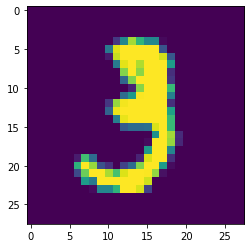

In [10]:
plt.imshow(img)
print(label)

## converting images to tensors

In [11]:
import torchvision.transforms as transform

In [12]:
ds=MNIST(root='dataset/',train=True,transform=transform.ToTensor())

In [13]:
img,label=ds[0]

In [14]:
print(img.shape)
print(label)

torch.Size([1, 28, 28])
5


In [15]:
y=img[0,10:15,10:15]
# y=torch.rand(1280,1280)

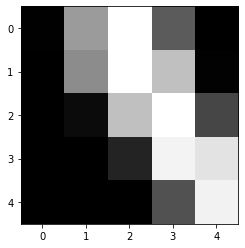

In [16]:
plt.imshow(y,cmap='gray')

## Understanding How to Split Training and Validation Data

In [17]:
import numpy as np

In [18]:
n=len(ds)

In [19]:
val_per=0.5

In [20]:
n_val=int(n*val_per)

In [21]:
idxs=np.random.permutation(n)

In [22]:
idxs

array([27975,  7522,  2208, ..., 20373,  6892, 13911])

In [23]:
idxs[:n_val]

array([27975,  7522,  2208, ..., 10816, 26329, 29957])

# Split Function

In [24]:
import numpy as np
def valSplit(n,split_percentage):
    num_val=int(n*split_percentage)
    indexs=np.random.permutation(n)
    print(indexs)
    return indexs[num_val:],indexs[:num_val]

In [25]:
train_index,validation_index=valSplit(len(ds),0.2)

[ 1522 25151 11531 ... 58609   697 55889]


In [26]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch

In [27]:
batch_size=100

train_sampler=SubsetRandomSampler(train_index)
train_Dl=DataLoader(ds,batch_size=batch_size,sampler=train_sampler)

vali_sampler=SubsetRandomSampler(validation_index)
vali_Dl=DataLoader(ds,batch_size=batch_size,sampler=vali_sampler)

In [28]:
train_set,validate_set=torch.utils.data.random_split(ds,[50000,10000])
train_dl=DataLoader(train_set,batch_size=batch_size)
vali_dl=DataLoader(validate_set,batch_size=batch_size)

In [29]:
img,label=ds[0]
img.shape

torch.Size([1, 28, 28])

## Model

In [30]:
import torch.nn as nn

In [31]:
model=nn.Linear(784,10)

In [32]:
for img,label in train_dl:
    print(label)
    print(img.shape)
    pred=model(img)
    break


tensor([9, 8, 0, 1, 9, 6, 8, 3, 1, 6, 6, 9, 3, 6, 3, 1, 1, 1, 0, 2, 8, 0, 9, 9,
        5, 9, 2, 6, 6, 9, 2, 2, 6, 9, 8, 7, 8, 2, 9, 0, 8, 1, 7, 2, 9, 3, 9, 1,
        8, 9, 3, 6, 4, 7, 2, 8, 3, 2, 8, 2, 1, 5, 4, 9, 3, 5, 0, 1, 7, 8, 6, 2,
        7, 1, 0, 5, 7, 4, 1, 3, 6, 6, 5, 4, 8, 6, 1, 4, 6, 5, 3, 9, 2, 7, 8, 5,
        7, 7, 2, 0])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at C:\cb\pytorch_1000000000000\work\aten\src\TH/generic/THTensorMath.cpp:41

In [33]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(784,10)
            
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        print(xb.shape)
        out=self.linear(xb)
        return out

model=MnistModel()        

In [34]:
for img,label in train_dl:
    op=model(img)
    l=label
    break
    

torch.Size([100, 784])


## Softmax


the soft max function is used to normalize the data
1. when we actually predict the values using LinearReg it's predicting the value and not classifing it.

2. so with soft max we first reduce the predictedd value to value b/w 0 and 1 because probablity is either it happens or not so in classification it's either it's the image or not.

3. And each element of the row must be b/w 0 and 1 and when we add all the elements of that predicted row it must be = 1

4. e= eulars constant 2.718

5. soft max = y(predicted values)=> e**y/E e**y
5. that is y is each individual element in the array and E e**y is sum of all the elements in the tensor e**y

In [35]:
val=op[0]
val

tensor([-2.5472e-04,  2.9417e-01, -5.3395e-02,  2.3518e-01, -2.2658e-01,
        -2.7767e-03,  6.9125e-02,  4.3511e-01, -9.4474e-02, -4.4929e-02],
       grad_fn=<SelectBackward>)

In [36]:
exp=torch.exp(val)
# exp is to raise e to the power of each element in the val tensor

In [37]:
prob=exp/torch.sum(exp)

In [38]:
torch.sum(prob)

tensor(1.0000, grad_fn=<SumBackward0>)

In [39]:
prob

tensor([0.0923, 0.1239, 0.0875, 0.1168, 0.0736, 0.0921, 0.0989, 0.1426, 0.0840,
        0.0883], grad_fn=<DivBackward0>)

## pytorch softmax

In [40]:
import torch.nn.functional as f

In [41]:
prob=f.softmax(op,dim=1)
prob

tensor([[0.0923, 0.1239, 0.0875, 0.1168, 0.0736, 0.0921, 0.0989, 0.1426, 0.0840,
         0.0883],
        [0.0754, 0.1348, 0.0800, 0.1358, 0.0726, 0.0970, 0.1011, 0.1297, 0.0934,
         0.0801],
        [0.0991, 0.0986, 0.0700, 0.1408, 0.0735, 0.1086, 0.1112, 0.1239, 0.0926,
         0.0816],
        [0.0920, 0.0988, 0.0928, 0.1040, 0.0896, 0.1071, 0.1097, 0.1092, 0.1139,
         0.0828],
        [0.0758, 0.1199, 0.0628, 0.1245, 0.0979, 0.1251, 0.1304, 0.1031, 0.0975,
         0.0631],
        [0.1060, 0.0990, 0.0741, 0.1089, 0.0694, 0.1038, 0.0910, 0.1467, 0.1174,
         0.0837],
        [0.0691, 0.1027, 0.0741, 0.1525, 0.0763, 0.1275, 0.1091, 0.1213, 0.0876,
         0.0798],
        [0.0865, 0.0836, 0.0784, 0.1156, 0.0896, 0.1107, 0.1252, 0.1250, 0.0947,
         0.0907],
        [0.0892, 0.0861, 0.0834, 0.1069, 0.0792, 0.1115, 0.1327, 0.1110, 0.1125,
         0.0875],
        [0.0940, 0.1189, 0.0816, 0.1322, 0.0643, 0.0945, 0.1098, 0.1259, 0.0926,
         0.0861],
        [0

In [42]:
max_pred,index_of_ele=torch.max(prob,dim=1)

In [43]:
max_pred

tensor([0.1426, 0.1358, 0.1408, 0.1139, 0.1304, 0.1467, 0.1525, 0.1252, 0.1327,
        0.1322, 0.1401, 0.1262, 0.1309, 0.1299, 0.1196, 0.1317, 0.1347, 0.1273,
        0.1744, 0.1351, 0.1339, 0.1353, 0.1217, 0.1382, 0.1284, 0.1336, 0.1383,
        0.1492, 0.1694, 0.1502, 0.1242, 0.1296, 0.1399, 0.1264, 0.1363, 0.1257,
        0.1401, 0.1216, 0.1354, 0.1521, 0.1597, 0.1260, 0.1355, 0.1222, 0.2333,
        0.1338, 0.1435, 0.1271, 0.1642, 0.1299, 0.1529, 0.1795, 0.1459, 0.1322,
        0.1275, 0.1423, 0.1398, 0.1198, 0.1346, 0.1364, 0.1270, 0.1157, 0.1248,
        0.1283, 0.1367, 0.1290, 0.1388, 0.1196, 0.1560, 0.1355, 0.1562, 0.1309,
        0.1336, 0.1229, 0.1236, 0.1303, 0.1524, 0.1487, 0.1282, 0.1266, 0.1279,
        0.1593, 0.1462, 0.1491, 0.1536, 0.1764, 0.1520, 0.1436, 0.1434, 0.1274,
        0.1271, 0.1273, 0.1394, 0.1352, 0.1287, 0.1417, 0.1325, 0.1463, 0.1570,
        0.1187], grad_fn=<MaxBackward0>)

In [44]:
# this the index of the max prob elements that was predicted
index_of_ele


tensor([7, 3, 3, 8, 6, 7, 3, 6, 6, 3, 3, 3, 8, 7, 4, 7, 3, 6, 7, 1, 8, 6, 8, 7,
        7, 7, 3, 7, 7, 7, 1, 1, 7, 3, 6, 7, 3, 7, 7, 7, 7, 7, 6, 1, 7, 6, 8, 6,
        7, 3, 6, 7, 7, 6, 6, 7, 6, 1, 3, 8, 7, 7, 7, 7, 6, 7, 7, 6, 7, 3, 7, 5,
        3, 8, 8, 7, 3, 7, 5, 6, 8, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 7, 7, 6, 7,
        3, 7, 6, 6])

In [45]:
# this the data label passed for the 100 images by the dataloader
l


tensor([9, 8, 0, 1, 9, 6, 8, 3, 1, 6, 6, 9, 3, 6, 3, 1, 1, 1, 0, 2, 8, 0, 9, 9,
        5, 9, 2, 6, 6, 9, 2, 2, 6, 9, 8, 7, 8, 2, 9, 0, 8, 1, 7, 2, 9, 3, 9, 1,
        8, 9, 3, 6, 4, 7, 2, 8, 3, 2, 8, 2, 1, 5, 4, 9, 3, 5, 0, 1, 7, 8, 6, 2,
        7, 1, 0, 5, 7, 4, 1, 3, 6, 6, 5, 4, 8, 6, 1, 4, 6, 5, 3, 9, 2, 7, 8, 5,
        7, 7, 2, 0])

### Accuracy : is calculated by dividing the total number of true or correct outcomes by the total sample space

In [58]:
def accuracy(xb,label):
    _,pred=torch.max(xb)
    return torch.sum(pred==label).item()/len(label).un

In [59]:
loss=nn.functional.cross_entropy(op,l)

## implementation of cross entropy using numpy

In [60]:
# values/ label is hot encoded
def cE(actual,pred):
    loss=-np.sum(actual*np.log(pred))
    return loss

In [61]:
lm=np.array([1,0,0])
bad_pred=np.array([0.1,0.2,0.7])
good_pred=np.array([0.7,0.2,0.1])

In [62]:
cE(lm,bad_pred)

2.3025850929940455

In [63]:
cE(lm,good_pred)

0.35667494393873245


## cross entropy using inbuilt function

In [64]:
loss=nn.functional.cross_entropy

In [65]:
ls=loss(op,l)

In [220]:
def fit(epoch,model,lossfunc,train_dl,val_dl,lre,opt=torch.optim.SGD):
    opt=opt(model.parameters(),lr=lre)
    for i in range(epoch):
        for img,label in train_dl:
            pred=model(img)
            loss=lossfunc(pred,label)
            loss.backward()
            opt.step()
            opt.zero_grad()
            return loss
        

In [221]:
class Mnistmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(784,10)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
    

In [222]:
model=MnistModel()

In [223]:

fit(10,model,loss,train_dl,vali_dl,0.000001)

torch.Size([100, 784])


tensor(2.3291, grad_fn=<NllLossBackward>)

In [224]:

fit(200,model,loss,train_dl,vali_dl,0.01)

torch.Size([100, 784])


tensor(2.3291, grad_fn=<NllLossBackward>)

In [225]:
for i in vali_dl:
  img,label=i
  break


In [226]:
x=img[6]
l=label[6]

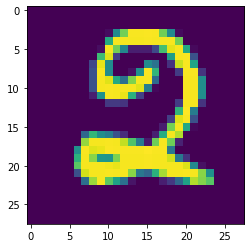

In [227]:
r=x.squeeze()
plt.imshow(r)

In [228]:
pre=model(x)
pre
maxx,val=torch.max(pre,dim=1)

torch.Size([1, 784])


In [229]:
val

tensor([0])

In [230]:
l

tensor(2)

In [231]:
label

tensor([0, 0, 0, 4, 5, 1, 2, 8, 7, 8, 6, 1, 2, 3, 9, 9, 8, 0, 9, 5, 9, 0, 5, 5,
        4, 2, 8, 3, 9, 0, 4, 0, 0, 6, 7, 3, 5, 1, 5, 8, 5, 4, 0, 6, 4, 5, 7, 5,
        5, 4, 8, 2, 1, 6, 1, 7, 9, 6, 3, 7, 2, 2, 0, 5, 9, 0, 1, 7, 2, 5, 5, 5,
        2, 7, 1, 0, 2, 1, 1, 4, 6, 8, 4, 8, 0, 6, 2, 6, 7, 6, 5, 8, 6, 2, 8, 9,
        3, 7, 0, 9])

## Test set

In [232]:
import torchvision.transforms as transform

In [233]:
test=MNIST(root='dataset/',train=False,transform=transform.ToTensor())

In [234]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [205]:
ts=DataLoader(test,batch_size=100)

In [235]:
for i,j in ts:
    pred=model(i)
    ls=loss(pred,j)
    _,maxs=torch.max(pred,dim=0)
    acc=torch.sum(maxs==j)/len(i)
print(f"loss={ls} acc={acc}")

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
loss=2.320666790008545 acc=0


In [236]:
torch.save(model.state_dict(),'MnistModel.pth')

In [237]:
model2=MnistModel()


In [238]:
model2.load_state_dict(torch.load('MnistModel.pth'))

<All keys matched successfully>